In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# Installing packages needed!
#!pip install fastai


In [3]:
import fastai        

In [4]:
import torch

In [5]:
def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

# The fun starts! 

In [1]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [2]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/Users/johanhansson/.fastai/data/mnist.pkl.gz')

In [3]:
with gzip.open(path, 'rb') as f:
    ((x_train,y_train), (x_valid, y_valid),_ ) = pickle.load(f,encoding = 'latin1') 
    

In [4]:
x_train, y_train , x_valid, y_valid = map(tensor, (x_train,y_train, x_valid, y_valid)) 
n,c = x_train.shape
x_train.shape


torch.Size([50000, 784])

In [5]:
assert n==y_train.shape[0]==50000

In [6]:
y_train.shape[0]

50000

In [7]:
mpl.rcParams['image.cmap'] = 'gray'

In [8]:
img = x_train[0]


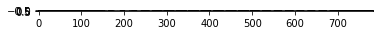

In [11]:
plt.imshow(img.view((1,784)))

In [10]:
img.view(28,28).size()

torch.Size([28, 28])

In [37]:
img.view(28,28).type

<function Tensor.type>

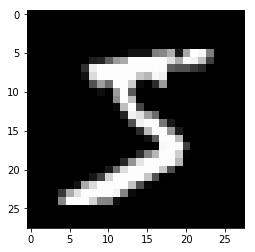

In [39]:
plt.imshow(img.view((28,28)))

In [46]:
weights = torch.rand([784,10])


In [ ]:
bias = torch.zeros([10]) 

## matrix multiplication 

In [62]:
def matmul(a,b): 
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): 
                c[i,j] += a[i,k] * b[k,j]
    return c
        
    print('godis')
    
    

In [63]:
m1 = x_valid[:5]
m2 = weights 
%time t1=matmul(m1, m2)


CPU times: user 1 s, sys: 6.04 ms, total: 1.01 s
Wall time: 1.02 s


In [60]:
m1.shape

torch.Size([5, 784])

In [61]:
t1.shape

torch.Size([5, 10])

#### Elementwise operations

In [65]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [66]:
a + b 

tensor([12., 14.,  3.])

In [67]:
a

tensor([10.,  6., -4.])

In [69]:
a.unsqueeze(0)

tensor([[10.,  6., -4.]])

In [71]:
a[:,None]

tensor([[10.],
        [ 6.],
        [-4.]])

#### matmull elementwise

In [ ]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [117]:
%timeit -n 10 _=matmul(m1, m2)


10 loops, best of 3: 218 µs per loop


### Matmul with brodcasting

In [122]:
def matmul(a,b): 
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros([ar,bc])
    for i in range (ar): 
        c[i] = (a[i  ].unsqueeze(-1) * b).sum(dim=0)
    return c

In [85]:
%timeit -n 10 _=matmul(m1, m2)


10 loops, best of 3: 207 µs per loop


In [119]:
m1[1].shape


torch.Size([784])

In [121]:
m2.shape

torch.Size([784, 10])

In [113]:
matmul(m1, m2)

tensor([[41.9607, 40.7565, 42.8848, 42.1772, 45.3237, 39.9221, 46.6140, 41.8349,
         42.5837, 40.5700],
        [41.3003, 45.2706, 47.4215, 48.7439, 48.1208, 46.6984, 44.7576, 44.2003,
         47.3815, 46.7951],
        [42.0002, 39.9521, 38.5451, 39.2664, 41.9645, 42.2289, 41.8680, 43.7430,
         41.0884, 41.4705],
        [39.5702, 37.9239, 44.2078, 38.0020, 39.2058, 40.3336, 39.0752, 40.3343,
         38.9003, 39.6717],
        [49.0040, 49.5828, 49.8998, 51.4474, 55.6989, 52.2132, 52.2678, 54.7363,
         53.8134, 50.5711]])

### Pytorch

In [115]:
m1.matmul(m2)

tensor([[41.9607, 40.7565, 42.8848, 42.1771, 45.3237, 39.9221, 46.6140, 41.8349,
         42.5837, 40.5700],
        [41.3003, 45.2706, 47.4216, 48.7439, 48.1208, 46.6984, 44.7576, 44.2003,
         47.3815, 46.7951],
        [42.0002, 39.9521, 38.5451, 39.2664, 41.9645, 42.2289, 41.8680, 43.7430,
         41.0884, 41.4705],
        [39.5702, 37.9239, 44.2078, 38.0020, 39.2059, 40.3336, 39.0752, 40.3343,
         38.9003, 39.6717],
        [49.0040, 49.5828, 49.8998, 51.4474, 55.6989, 52.2132, 52.2678, 54.7362,
         53.8134, 50.5711]])

In [116]:
%timeit -n 10 t2 = m1.matmul(m2)


10 loops, best of 3: 15.3 µs per loop
